# 1. Data cleaning 
# 2. EDA 
# 3. Textpreprocessing
# 4. Model building
# 5. Evalaution
# 6.Improvememnt
# 7.website
# 8. deploy

In [179]:
import numpy as np
import pandas as pd

In [180]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [181]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1155,ham,"Sorry man, accidentally left my phone on silen...",NaN,NaN,NaN
1210,ham,Guessin you ain't gonna be here before 9?,NaN,NaN,NaN
250,ham,Ranjith cal drpd Deeraj and deepak 5min hold,NaN,NaN,NaN
3364,ham,"Sorry, I'll call later",NaN,NaN,NaN
2727,ham,Whatsup there. Dont u want to sleep,NaN,NaN,NaN


In [182]:
df.shape

(5572, 5)

## 1. Data cleaning 

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [184]:
#drop the last 3 colums
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [185]:
df.sample(5)

,v1,v2
1129,ham,So check your errors and if you had difficulti...
665,ham,En chikku nange bakra msg kalstiya..then had t...
2678,ham,Was playng 9 doors game and gt racing on phone...
4803,ham,"Er, hello, things didnÛ÷t quite go to plan Û..."
2615,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.


In [186]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4833,ham,I hope your pee burns tonite.
33,ham,For fear of fainting with the of all that hous...
2823,ham,No need to buy lunch for me.. I eat maggi mee..
110,ham,What is the plural of the noun research?
4671,spam,Customer service announcement. We recently tri...


In [187]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [188]:
df['target']=encoder.fit_transform(df['target']) #ham=0, spam=1

In [189]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [190]:
# misisng values
df.isnull().sum()

target    0
text      0
dtype: int64

In [191]:
#check for duplicates
df.duplicated().sum()

403

In [192]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [193]:
df.duplicated().sum()

0

In [194]:
df.shape

(5169, 2)

# 2. EDA

In [195]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
df['target'].value_counts() # 86% ham, 13% spam

target
0    4516
1     653
Name: count, dtype: int64

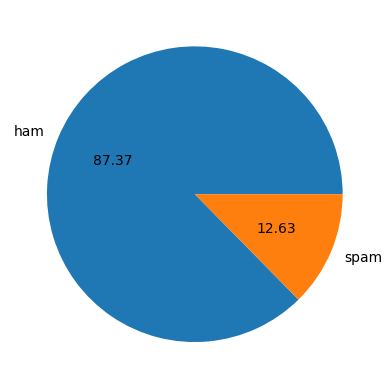

In [197]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [198]:
#Data is imbalanced

In [199]:
import nltk

In [200]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
#number characters
df['num_characters']=df['text'].apply(len)

In [202]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [203]:
#number of words
df['num_words']=df['text'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [204]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [205]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)


In [206]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [207]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [208]:
#this is for ham messages:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [209]:
#this is for spam messages:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [210]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

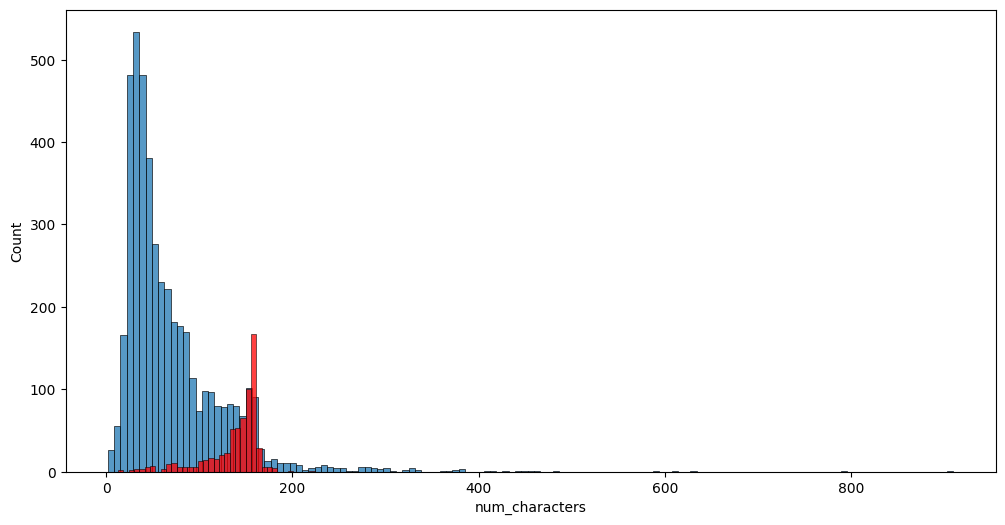

In [211]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

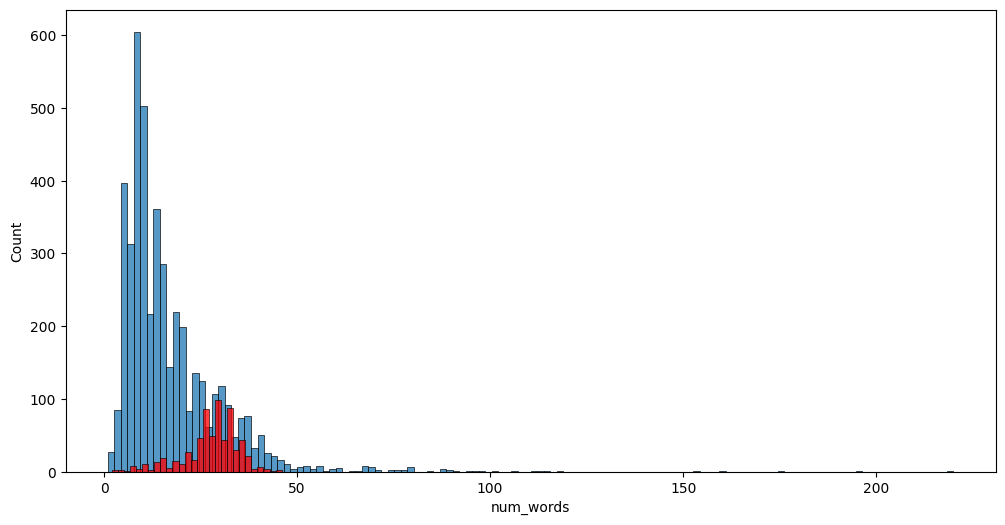

In [212]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

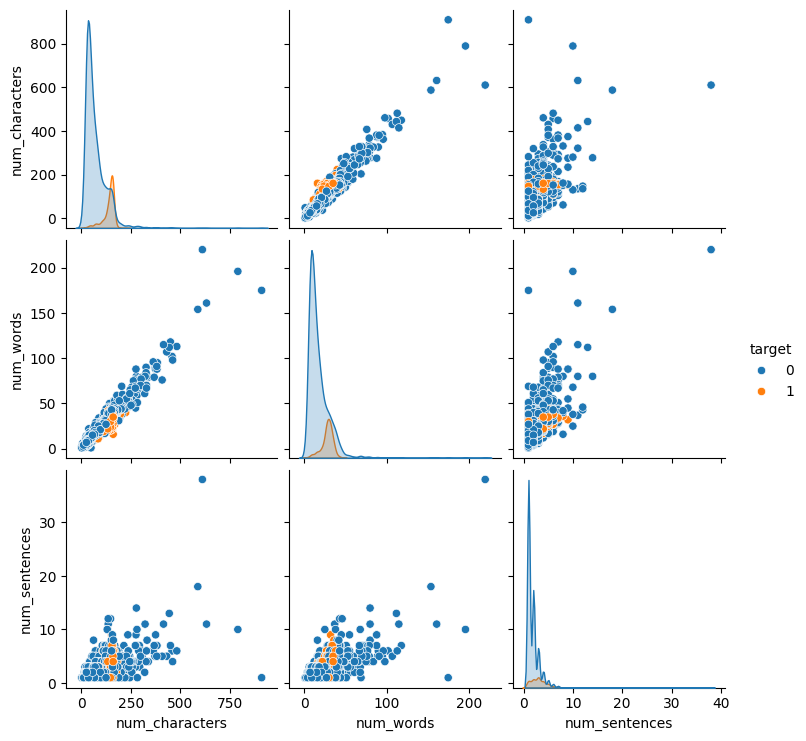

In [213]:
sns.pairplot(df,hue='target')

In [214]:
#sns.heatmap(df.corr(),annot=True)


# 3. Data Preprocessing 

  ## Lower case 
  ## Tokenization
  ## Removing special characters
  ## Removing stop words and punctuation
  ## Stemming


In [215]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = nltk.word_tokenize(text)
    # Remove special characters and stopwords, apply stemming
    words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return " ".join(words)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [216]:
# Test the function
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [217]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [218]:
# Apply transformation
df['transformed_text'] = df['text'].apply(transform_text)

In [219]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [220]:
# word cloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [221]:
#for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))



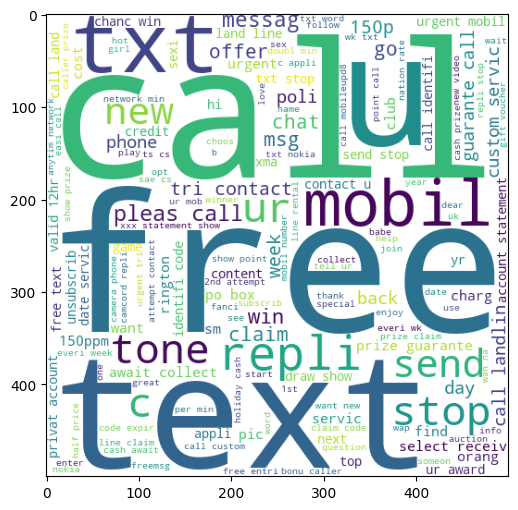

In [222]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [223]:
#for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))



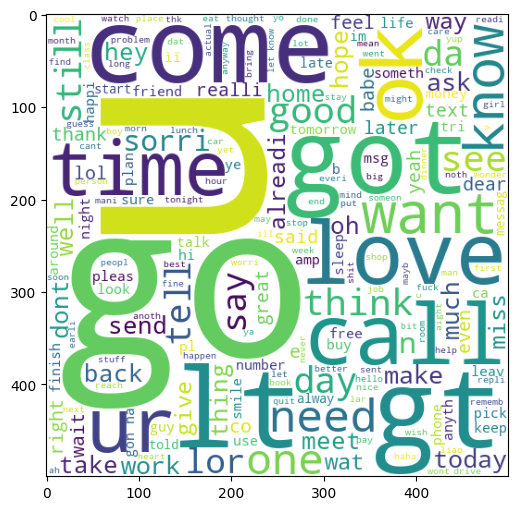

In [224]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [225]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [226]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
    

In [227]:
len(spam_corpus)

9939

In [228]:
from collections import Counter
# Convert Counter output to DataFrame
spam_word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])




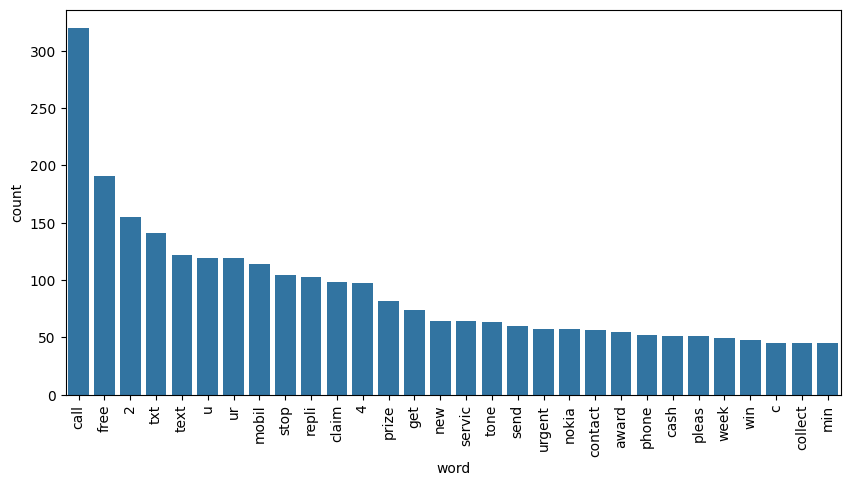

In [229]:
# Plot using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=spam_word_freq)
# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.show()

In [230]:
# Extract words from ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    ham_corpus.extend(msg.split())

In [231]:
len(ham_corpus)

35404

In [232]:
# Convert Counter output to DataFrame
ham_word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])


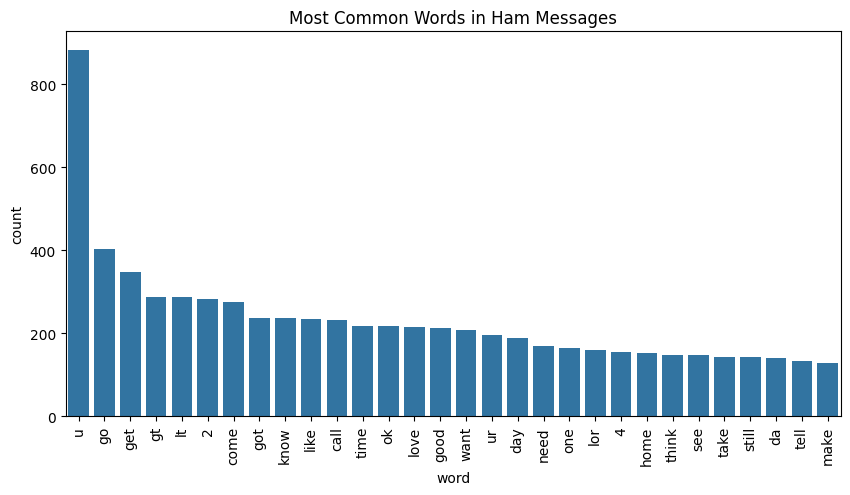

In [233]:
# Plot using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=ham_word_freq)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.title("Most Common Words in Ham Messages")
plt.show()

# 4. Model Building 

### We are going to use naive bayes classifier .......... CUZ :-Naive Bayes Classifier: Naive Bayes is a simple and effective algorithm for text classification in NLP. It is based on the Bayes theorem and assumes that the presence of a particular feature in a class is independent of the presence of any other feature.

In [234]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)


In [235]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [236]:
X.shape

(5169, 3000)

In [237]:
y=df['target'].values

In [238]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [241]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [242]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [243]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [244]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [245]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [246]:
# tfidf vectorizer with MultinomialNB

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [248]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [249]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [250]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [251]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [252]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [253]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [254]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [255]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


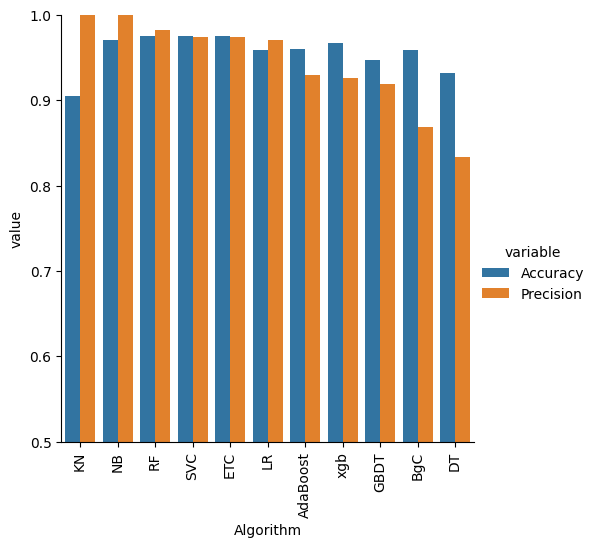

In [256]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model improvement
### 1 . change the max_features in TfidfVectorizer ...changing in upper cell